# Python 入門編５：辞書型
## 目次
* [1. 辞書型の基本操作](#1.-辞書型の基本操作)
 * [値の取り出し](#値の取り出し)
 * [キーの存在チェック](#キーの存在チェック)
 * [キーと値の登録・値のアップデート](#キーと値の登録・値のアップデート)
  * [キーは一意](#キーは一意)
 * [キーの削除](#キーの削除)
 * [キーについてのループ](#キーについてのループ)
 * [値についてのループ](#値についてのループ)
 * [キーと値についてのループ](#キーと値についてのループ)
* [2. 辞書を使った処理の練習](#2.-辞書を使った処理の練習)
 * [練習5.1: 数式翻訳](#練習5.1:-数式翻訳)
 * [練習5.2: リストの要素を数える](#練習5.2:-リストの要素を数える)
 * [練習5.3: 支出の集計](#練習5.3:-支出の集計)
 * [練習5.4: 成績データの集計](#練習5.4:-成績データの集計)
* [課題提出の前の注意](#課題提出の前の注意)
* [チャレンジ課題5.5: in 演算の速さ](#チャレンジ課題5.5:-in-演算の速さ)
 * [Step 1: 辞書の in 演算の速さ](#Step-1:-辞書の-in-演算の速さ)
 * [Step 2: リストの in 演算の速さ](#Step-2:-リストの-in-演算の速さ)
 * [Step 3: 要素が存在しない場合の計算時間](#Step-3:-要素が存在しない場合の計算時間)
 * [Step 4: 考察](#Step-4:-考察)
* [課題提出の前の注意](#課題提出の前の注意)

---
このノートブックでは，辞書型のデータ（dictionary）の使い方を練習する．

辞書型は，**キー**と**値**の２つのデータのペアを集めたものとみなせる．

まずは例を見てみよう．下のセルは，動物の名前をキー，動物の年齢を値とする辞書を定義している．実行しなさい：

In [173]:
age = {"太郎": 18, "次郎": 16, "花子": 15, "ミケ": 5}

print(age["花子"])

15


上のセルでは，辞書型のデータ `age` を
`{ キー1: 値1, キー2, 値2, ..., キーn: 値n }`
の構文で直接定義している．

そして，`age[キー]` の構文で，キー`"花子"`に対応付けられた値 `15` を取り出して表示している．

このように，辞書型のデータは，
```
キー1 → 値1
キー2 → 値2
...
キーn → 値n
```
という対応関係を表している．

同様の対応付けは，キーのリストと値のリストを別々に用意することでも実現できる．
例えば上のセルと同じ対応づけをするには
```python
keys = ["太郎", "次郎", "花子", "ミケ"]
values = [18, 16, 15, 5]
```
という２つのリストを用意すればよい．この場合，花子の年齢つまりキー `"花子"` に対応づけられた値を得るには
1. `keys` のリストから `"花子"` を探し，その番号（添字）を得る．この場合，`"花子"` の添字は 2 である．
2. 同じ添字 2 を使って `values` のリストから値 `values[2]` すなわち `15` を得る．
という2段階の処理が必要になる．

しかし，辞書を使えば，キーに結び付けられた値を添え字演算子 `x[キー]` を用いて高速に，かつ簡単に取り出せる．


## 1. 辞書型の基本操作

### 値の取り出し
上で見たように，辞書 `x` に対して，`x[キー]` の形でキーに対応付けられた値を取り出せる：

In [174]:
age["太郎"]

18

辞書に存在しないキーの値を添え字として指定するとエラー（正確には「例外」）が発生する．

下のセルを実行して，エラーになることを確認しなさい：

In [175]:
#age["タマ"]

エラーになることを確認したら，後で "Run All Cells" するときに止まらないように上のセルの中身を `#` でコメントアウトしなさい．

### キーの存在チェック
ある辞書 `d` に，キーとして `k` が存在するかどうかは `k in d` という式（in 演算子）で調べることができる．

すなわち，辞書 `d` にキー `k` が存在すれば `k in d` は `True`，存在しなければ `False` となる．

下のセルを実行して，`in` 演算子の返り値を見てみなさい：

In [176]:
"太郎" in age

True

In [177]:
"タマ" in age

False

辞書 `age` は `{"太郎": 18, "次郎": 16, "花子": 15, "ミケ": 5}` という内容だった．

従って，`"太郎" in age` は `True` となり，`"タマ" in age` は `False` となる．

この `キー in 辞書` の式と if 文を組み合わせれば，ある値が辞書に存在するかどうかによって処理を分けることができる．

以下は，入力として辞書 `age` に存在するキーが与えられたときは対応する値を表示し，存在しない場合はその旨を表示する関数である：

In [178]:
def find_age(name):
    if name in age:
        print(name, "は", age[name], "才です")
    else:
        print(name, "は登録されていません")

下のセルを実行して `find_age` 関数の動作を確認しなさい：

In [179]:
find_age("次郎")
find_age("ジョン")

次郎 は 16 才です
ジョン は登録されていません


### キーと値の登録・値のアップデート
辞書に，新しいキーとその値を登録するには，`x[新しいキー]` に値を代入すればよい．

以下は，辞書 `age` に新しいキー`"三郎"` と値 `25` を登録する例である：

In [180]:
age["三郎"] = 25

上のセルを実行した後で，新しいキー `"三郎"` が辞書に存在することを `in` で確かめ，さらに値を取り出しなさい：

In [181]:
"三郎" in age

True

In [182]:
age["三郎"]

25

辞書にすでに存在するキーを指定して `x[キー] = ...` の形で代入した場合は，すでに存在するキーに対応する値が上書きされる．

以下は，辞書 `age` でキー `太郎` に対応付けられた値を `100` で上書きする:

In [183]:
age["太郎"] = 100

上のセルを実行した後で `age["太郎"]` で値を取り出せばもちろん 100 が返ってくるが，辞書全体を print することでも更新後のキーと値の対応を見ることができる：

In [184]:
print(age)

{'太郎': 100, '次郎': 16, '花子': 15, 'ミケ': 5, '三郎': 25}


また，`x[キー] = x[キー] + 1` のようにすれば，（すでに存在する）キーに対応する値を 1 増やすことができる．
同じことは， `+=` 演算子を使って `x[キー] += 1` とも書ける．

下のセルを実行すると，キー "次郎" と "花子" に対応付けられた値がそれぞれ 1 増やされる： 

In [185]:
print("変更前")
print(age)

age["次郎"] = age["次郎"] + 1 # 意味は += 1 と同じ
age["花子"] += 1

print("変更後")
print(age)

変更前
{'太郎': 100, '次郎': 16, '花子': 15, 'ミケ': 5, '三郎': 25}
変更後
{'太郎': 100, '次郎': 17, '花子': 16, 'ミケ': 5, '三郎': 25}


#### キーは一意
以上から分かるように，ひとつの辞書の中で，あるキーは対応する値をひとつしか持てない．
言い換えると，ひとつの辞書には同じキーは一つしか登録できない．

### キーの削除
いったん辞書に登録したキーを，（対応する値とともに）削除したくなることがある．
これは `del` 演算子を用いてできる．

下のセルを実行すると，辞書 `age` からキー `太郎` が削除される：

In [186]:
del age["太郎"]

辞書 `age` を print して，キー "太郎" が無くなったことを確認しなさい：

In [187]:
print(age)

{'次郎': 17, '花子': 16, 'ミケ': 5, '三郎': 25}


### キーについてのループ
辞書中の全てのキーについて何かの処理をしたいことがよくある．

辞書 `d` の中のキーをひとつづつ取り出して，そのつど変数 `k` にセットするループ処理は
```python
for k in d.keys():
    ... k を使った処理 ...
```

と書ける．

以下は，辞書 `age` の中のキーを一つずつ取り出して表示するプログラムである．実行して結果を確かめなさい：

In [188]:
for name in age.keys():
    print(name)

次郎
花子
ミケ
三郎


### 値についてのループ
キーではなく，辞書 `d` の中の値のほうをひとつづつ取り出すループは `values` メソッドを使って以下のように書ける：
```python
for v in d.values():
    ... v を使った処理 ...
```

辞書中で，異なるキーに対して同じ値が登録されている場合は，同じ値が何回か（辞書に現れる回数だけ）ループ変数 `v` にセットされる．

以下は，名前 → 好物 の対応を記録した辞書から，値（好物）だけを取り出して表示するプログラムである．実行して結果を確かめなさい：

In [189]:
like = {"太郎": "どら焼き", "次郎": "チョコ", "花子": "プリン", "ミケ": "プリン"}

for v in like.values():
    print(v)

どら焼き
チョコ
プリン
プリン


### キーと値についてのループ
辞書中のそれぞれのキーについて，対応する値も一緒に取り出してループ処理したいことも多い．

この場合，辞書 `d` の全体に対して，対応するキー `k` と値 `v` のペアをひとつづつ処理するためのループ処理は
```python
for k, v in d.items():
    ... k と v を使った処理 ...
```
と書ける．

以下は，辞書 `age` の中のキーと値の組を一つずつ取り出して表示するプログラムである．実行して結果を確かめなさい：

In [190]:
for name, nenrei in age.items():
    print("{} は {}才".format(name, nenrei))

次郎 は 17才
花子 は 16才
ミケ は 5才
三郎 は 25才


## 2. 辞書を使った処理の練習

### 練習5.1: 数式翻訳
例えば "1 + 1 = 2" → "いちたすいちはに" のように，入力された1桁の数についての数式の読み方を教えてくれるプログラムを作りたい．

まず以下のセルの辞書 `math_dict` の定義に "3", ..., "9" の読みを追加せよ．（キーである "3", ..., "9" は数値ではなく文字列としての数字であることに注意せよ）

In [191]:
math_dict = {
    "0": "ぜろ",
    "1": "いち", 
    "2": "に",
    # "3" ... "9" を埋める
    "3": "さん",
    "4": "よん",
    "5": "ご",
    "6": "ろく",
    "7": "なな",
    "8": "はち",
    "9": "きゅう",
    "+": "たす",
    "-": "ひく",
    "*": "かける",
    "/": "わる",
    "=": "は"
}

次に，数式を表す文字列 `expr` を受け取り，`math_dict` を使って，`expr` の読み方をひらがなの文字列として返す関数 `math_translate(expr)` の実装を完成させよ．

入力 `expr` は1桁の整数と `+-*/=` だけを含み，数と記号の間にはスペースが一つ入っていると仮定してよい．

実行例：
```python
math_translate("1 + 1 = 2") --> "いちたすいちはに"
math_translate("3 / 3 + 2 = 3") --> "さんわるさんたすにはさん"
```

ヒント（ダブルクリックで表示）
<!--
入力された数式 expr を expr.split(" ") とすると空白で区切られた部分のリストが返される
（そこまでは以下のセルに書いてある）

例えば expr = "1 + 1 = 2" のときは，expr.split(" ") の結果は

["1", "+", "1", "=", "2"]

というリストになる．このリスト（下のセルでは words という変数に代入される）から
記号と整数をひとつづつ取り出すには

for w in words:
   ...

という形のループを用いればよい．

ループごとに取り出された記号 w の読みを math_dict[w] によって取り出し，
文字列 s に結合して，最後に s を return すればよい．
-->

In [192]:
def math_translate(expr):
    # 空白で区切って記号と整数（を表す文字列）のリストにする
    words = expr.split(" ") # 例："1 + 1 = 2" -> ["1", "+", "1", "=", "2"]
    
    s = ""
    # *** 実装しなさい ***
    # リスト words の中の数字と記号を，
    # math_dict を使ってひらがな列に置き換え，文字列 s に結合する
    for i in range (0,len(words)):
        s+=math_dict[words[i]]
    return s    

実装できたらテストしましょう：

In [193]:
def test_math_translate(expr, yomi):
    trans = math_translate(expr)
    if trans == yomi:
        result = "テスト成功"
    else:
        result = "テスト失敗"
    print(expr, "->", yomi, "...", result)
    
test_math_translate("1 + 1 = 2", "いちたすいちはに")
test_math_translate("2 * 3 = 6", "にかけるさんはろく")
test_math_translate("5 = 6 - 1", "ごはろくひくいち")
test_math_translate("2 = 2 = 2", "にはにはに")
test_math_translate("3 / 3 + 2 = 3", "さんわるさんたすにはさん")

1 + 1 = 2 -> いちたすいちはに ... テスト成功
2 * 3 = 6 -> にかけるさんはろく ... テスト成功
5 = 6 - 1 -> ごはろくひくいち ... テスト成功
2 = 2 = 2 -> にはにはに ... テスト成功
3 / 3 + 2 = 3 -> さんわるさんたすにはさん ... テスト成功


---
### 練習5.2: リストの要素を数える
入力として与えられたリストの中で，どの要素が何回出てきたかを数え，要素をキー，出現回数を値とする辞書の形で返す関数 `count_elem(xs)` を実装しなさい．

実行例1（文字列のリストを与えた場合）：
```python
count_elem(["みかん", "りんご", "りんご", "キウイ"])
→ {"みかん": 1, "りんご": 2, "キウイ": 1}
```

実行例2（整数のリストを与えた場合）：
```python
count_elem([1, 1, 1, 2, 3, 2, 2])
→ {1: 2, 2: 3, 3: 1} # 1が3回，2が3回，3が1回出現した
```

ヒント：
* 要素 `x` の出現回数を記録する辞書 `count` を空の辞書 `{}` で初期化し，要素 `x` を見つけるたびに回数 `count[x]` を増やしていけばよい
* リスト `xs` の要素をひとつづつ取り出すループは `for x in xs: ...` と書けるのだった
* リストから取り出した要素 `x` が，初めて出現した値か，そうでないかに応じて，処理を以下のように切り替える必要がある：
  * 初めて出現した要素 `x` → `count[x]` に 1 をセットする
  * 2回目以降の要素 `x` → `count[x]` を 1 増やす
* `x` が初めて出現した要素かどうかは，`if x in count` で調べて場合分けすればよい

さらにヒント（ダブルクリックで表示）
<!--
count_elem の全体は次のような構造になるはずである

def count_elem(xs):
    count = {} # count を {} で初期化する
    リスト xs の中の要素 x のそれぞれについて
       もし x が count の中にあれば
          count[x] を 1 増やす
       そうでなければ
          count[x] に 1 をセットする
    count を return する
-->

In [194]:
def count_elem(xs):
    # *** 実装しなさい ***
    r={}
    c=len(xs)
    for i in xs:
        if i in r:
            r[i] += 1
        else:
            r[i] = 1
    return r

実装できたらテストしましょう：

In [195]:
print(count_elem([1, 1, 2, 3, 1]) == {1: 3, 2: 1, 3: 1})
print(count_elem(["ねこ", "ねこ", "パンダ", "ねこ", "パンダ"]) == {"ねこ": 3, "パンダ": 2})

True
True


### 練習5.3: 支出の集計
例えば

    卵 → 食費
    パン → 食費
    靴下 → 衣服費
    映画代 → 娯楽費
    
のような**品目 → 分類**の対応を記録した辞書 `bunrui` と，

    卵 → 20
    パン → 200
    靴下 → 500
    映画代 → 1800
    
のような**品目 → 単価**の対応を記録した辞書 `tanka` および
```python
[["卵", 10], ["パン", 1], ["靴下", 4], ["映画代", 1]]
```    
のように \[品目, 購入個数\] を並べた2重リスト `kosuu` を受け取り，

    食費 → 400
    衣服費 → 2000
    娯楽費 → 1800

のような**分類 → 支出総額**の対応を記録した辞書を返す関数 `shukei(bunrui, tanka, kosuu)` を実装しなさい．購入個数のリスト `kosuu` の中にある品目（例えば "卵"）は，辞書 `bunrui` および `tanka` のキーとして必ず存在すると仮定してよい：

ヒント（ダブルクリックで表示）
<!--
まだ処理のイメージがつかめない人は説明中のデータに対して

* 食費 → 400
* 衣服費 → 2000
* 娯楽費 → 1800

の支出総額の計算式を書いてみなさい．例えば食費は
   食費 = 卵 x 10個 + パン x 1個 = 20 x 10 + 200 x 1 = 400
となる．
-->

さらにヒント（ダブルクリックで表示）
<!--
shukei の実装はだいたい以下の構造になるだろう

def shukei(bunrui, tanka, kosuu):
    summary を {} で初期化する
    kosuu の要素 item_num のそれぞれについて # -> item_num には ["卵", 100] のような長さ2のリストが順にセットされる
        item_num[0] を item という変数にセットする # わかりやすさのため
        item_num[1] を num という変数にセットする  # わかりやすさのため
        bunrui の辞書から item の分類を取り出し b という変数にセットする
        tanka  の辞書から item の単価を取り出し t という変数にセットする
        もし b が summary に既に登録されていたら
           summary[b] に 個数 * 単価 を加える
        そうでなければ
           summary[b] に 個数 * 単価 をセットする
-->

In [196]:
def shukei(bunrui, tanka, kosuu):
    # *** 実装しなさい ***
    summary={}
    for i in range (len(kosuu)):
        item=kosuu[i][0]
        num=kosuu[i][1]
        b=bunrui[item]
        t=tanka[item]
        if b in summary:
            summary[b]+=num*t
        else:
            summary[b]=num*t
    return summary

実装できたらテストしなさい：

In [197]:
bunrui = {"卵": "食費", "パン": "食費", "米": "食費", "玉ねぎ": "食費",
          "靴下": "衣服費", "シャツ": "衣服費", "ハンカチ": "衣服費",
          "映画代": "娯楽費", "カラオケ": "娯楽費",
          "ノート": "日用品", "石鹸": "日用品", "シャンプー": "日用品"}

tanka = {"卵": 30, "パン": 200, "米": 1000, "玉ねぎ": 50,
         "靴下": 500, "シャツ": 5000, "ハンカチ": 500,
         "映画代": 1800, "カラオケ": 400,
         "ノート": 200, "石鹸": 100, "シャンプー": 500}

print(shukei(bunrui, tanka, [["卵", 10], ["玉ねぎ", 4], ["靴下", 5], ["シャツ", 2], ["シャンプー", 1], ["パン", 4]]) ==
      {'食費': 1300, '衣服費': 12500, '日用品': 500})

print(shukei(bunrui, tanka, [["パン", 10], ["パン", 10], ["パン", 10], ["カラオケ", 2], ["カラオケ", 2]]) ==
      {"食費": 6000, "娯楽費": 1600})

True
True


### 練習5.4: 成績データの集計
リスト処理の練習で，行列を
```python
[ [1, 2],
  [3, 4] ]
```
のような2重のリストで表した．

同様に，辞書中でそれぞれのキーに対応する値がふたたび辞書になっている2重の辞書が作れる．

例えば，以下の辞書 `scores` は学生番号 1001 ～ 1004 の学生について，各学生が履修した科目とその成績（100点満点）を記録した2重の辞書である．実行して，`scores` の定義を有効にしなさい：

In [198]:
scores = {
    1001: { "線形代数": 80,
            "微積分": 70,
            "英語": 50,
            "物理": 80 },
    1002: { "線形代数": 90,
            "微積分": 80,
            "英語": 60,
            "生物": 50 },
    1003: { "フランス語": 60,
            "生物": 50 },
    1004: { "線形代数": 100,
            "微積分": 60,
            "物理": 70}
}

もしも番号 1003 の学生がフランス語を履修していることを**あらかじめ知っていれば**，添え字演算子を2度使い `scores[1003]["フランス語"]` とすることで成績 `60` が取り出せる：

In [199]:
scores[1003]["フランス語"]

60

この動作は，`(scores[1003])["フランス語"]` のようにカッコを入れてみると分かりやすいかもしれない．

つまり，まず `scores[1003]` によって，学生番号をキーとする外側の辞書からキー 1003 に対応する値である内側の辞書 `{"フランス語": 60, "生物": 50 }` が取り出される：

In [200]:
scores[1003]

{'フランス語': 60, '生物': 50}

この内側の辞書に対して添え字演算子 `["フランス語"]` を適用することによって値 `60` が取り出せる．この2段階の「辞書引き」をひとつにまとめたのが `scores[1003]["フランス語"]` のように添字演算子 `[1003]` と `["フランス語"]` を連続させる書き方である．

<!--
実際，`{キー: 値, ...}` の書き方で辞書を直接プログラムに記述し，その後に添え字演算子 `[キー]` を続けることでも値が取り出せる（本当にそのような書き方をする必要はめったにないが）:

{"フランス語": 60, "生物": 50 }["フランス語"]
-->

このように添字演算子 `[...]` を使うやり方は便利だが，**辞書にキーが存在することが確実でないと使えない**ことに注意する必要がある．
このノートブックのはじめの方で確かめたように，辞書に存在しないキーを添字演算子で指定するとエラーになる．

一方，もしも
* どの学生番号が登録されているか
* どの学生が何の科目を履修しているか

が分からない場合でも，2重辞書に対して2重のループを用いることで色々な処理が行える．

以下は，`scores` の（外側の辞書の）それぞれのキーに対して，その値である辞書の中身である（科目，成績）を適当に整形して表示する例である．実行して，どうしてそのような結果になるのかを理解しなさい：

In [201]:
for number, tensu in scores.items(): # 各学生番号 number とその成績 tensu に対し
    print("学生番号: {}".format(number)) # 学生番号を表示
    for subj, score in tensu.items():  # 各科目 subj とその成績 score に対し
        print("  {} ... {}点".format(subj, score)) # 科目ごとの成績を表示

学生番号: 1001
  線形代数 ... 80点
  微積分 ... 70点
  英語 ... 50点
  物理 ... 80点
学生番号: 1002
  線形代数 ... 90点
  微積分 ... 80点
  英語 ... 60点
  生物 ... 50点
学生番号: 1003
  フランス語 ... 60点
  生物 ... 50点
学生番号: 1004
  線形代数 ... 100点
  微積分 ... 60点
  物理 ... 70点


---
**練習１**：上の `scores` の形式の2重の辞書を受けとって，各科目の平均点を計算して以下の例のように表示する関数 `average` を実装しなさい（科目の順番はどうでもよい）．

実行例：
```
線形代数: 90.0点
微積分: 70.0点
英語: 55.0点
物理: 75.0点
生物: 50.0点
フランス語: 60.0点
```

ヒント（ダブルクリックで表示）
<!--
average の処理手順はだいたい以下のようになるだろう

def average(scores):
    科目ごとに受講者の得点の合計を記録する辞書 score_sums を {} で初期化する
    科目ごとに受講者の人数を記録する辞書 num_students を {} で初期化する

    上のセルの例のように，
      外側の辞書に対するループ
        　内側の辞書に対するループ
    という２重の for ループを作る．
    それぞれ items() メソッドを使って，キーと値を両方取り出す形のループにすればよい．

    内側のループの中では，各受講者の科目と得点に対し
       score_sum の中の科目の得点合計に加算する
       num_students の科目の受講者人数を 1 増やす

    最後に scores_sum の中の 科目，得点合計 に対するループを作り
       平均点つまり 得点合計 / 受講者人数 を表示する
       （受講者人数は num_students の辞書から得られる）
-->

さらにヒント（ダブルクリックで表示）
<!--
より詳しく書けば average の処理手順は以下のようになるだろう

def average(scores):
    score_sums = {}   # 科目ごとの得点の合計を空の辞書で初期化
    num_students = {} # 科目ごとの人数を空の辞書で初期化
    
    for tensu in scores.values(): # scores の値（各学生の科目-得点の辞書）それぞれについて
        for subj, score in tensu.items(): # 科目と得点それぞれについて
            科目 subj の得点合計を score だけ増やして score_sums に記録
            科目 subj の受講者数を 1 増やして num_students に記録
    
    for subj, num in num_students.items():
        科目 subj の平均点を score_sums[subj] と num から計算して
        科目名: 平均点
        の形式で表示する            
-->

In [202]:
def average(scores):
    # *** 実装しなさい ***
    score_sum={}
    seito={}
    for tensu in scores.values():
        for subj in tensu:
            if subj in score_sum:
                score_sum[subj]+=tensu[subj]
                seito[subj]+=1
            else:
                score_sum[subj]=tensu[subj]
                seito[subj]=1
                
    for subj,num in seito.items():
        print("{}: {}点".format(subj,score_sum[subj]/num))

実装できたら，テストしなさい．結果は（科目の順番を除き）上の実行例と一致するはずである：

In [203]:
average(scores)

線形代数: 90.0点
微積分: 70.0点
英語: 55.0点
物理: 75.0点
生物: 50.0点
フランス語: 60.0点


**練習2**: 上の `scores` の形式の2重の辞書を受け取って，各科目の最高点と最低点を以下の例のように表示する関数 `maxmin` を実装しなさい．

実行例：
```
線形代数: 最高=100点, 最低=80点
微積分: 最高=80点, 最低=60点
英語: 最高=60点, 最低=50点
物理: 最高=80点, 最低=70点
生物: 最高=50点, 最低=50点
フランス語: 最高=60点, 最低=60点
```

ヒント（ダブルクリックで表示）
<!--
プログラムの大きな流れは上の average と同様になる．
ただし最初に
* 科目名をキー，最低点を値とする辞書
* 科目名をキー，最高点を値とする辞書
をそれぞれ空の辞書で初期化する．

２重ループの中では，各学生，各科目の得点に対し（科目と得点を表すループ変数をそれぞれ subj と score とするとき）

* 科目 subj が最低点の辞書に存在しなければ，
  キー subj に対応する値として得点 score をセットする
    
* 科目 subj が最低点の辞書に存在し，かつ score が辞書に記録されている得点よりも低ければ
  キー subj に対応する値を score で更新する
    
とすればよい（最高点の辞書についても同様）

最後に，最低点の辞書のキーを keys() で一つずつ取り出し，
    科目名: 最高=XX点, 最低=YY点
のフォーマットで表示する．
-->

In [204]:
def maxmin(scores):
    # *** 実装しなさい ***
    score_max={}
    score_min={}
    for tensu in scores.values():
        for subj in tensu:
            if subj in score_min and score_min[subj]>tensu[subj]:
                score_min[subj]=tensu[subj]
            elif subj in score_max and score_min[subj]<tensu[subj]:
                score_max[subj]=tensu[subj]
            else:
                score_min[subj]=tensu[subj]
                score_max[subj]=tensu[subj]
    for subj, num in score_min.items():
        print("{}: 最高={}点,最低={}点".format(subj,score_max[subj],score_min[subj]))

実装できたら，テストしなさい．結果は（科目の順番を除き）上の実行例と一致するはずである：

In [205]:
maxmin(scores)

線形代数: 最高=100点,最低=80点
微積分: 最高=80点,最低=60点
英語: 最高=60点,最低=50点
物理: 最高=80点,最低=70点
生物: 最高=50点,最低=50点
フランス語: 最高=60点,最低=60点


**練習3**: 上の`scores`の形式の2重の辞書を受け取って，各科目について最高点の学生の番号を（複数いればすべて）以下のように表示する関数 `best_students` を実装しなさい．

実行例：
```
線形代数: [1004]
微積分: [1002]
英語: [1002]
物理: [1001]
生物: [1002, 1003]
フランス語: [1003]
```

ヒント１：辞書の値としてリストをセットすることができる．さらに，キー `x` に対する値 `d[x]` がリストの場合には，`d[x].append(y)` でリスト `d[x]` に値 `y` を追加できる．

ヒント２：学生番号のリスト `xs` が例えば値 `[1002, 1003]` を持つ場合，単に `print("英語: {}".format(xs))` と `format` メソッドの引数としてリストを渡せば `"英語: [1002, 1003]"` のように表示される．


In [206]:
def best_students(scores):
    # *** 実装しなさい ***
    max_scores = {}
    best_students_map = {}

    for student_id, subjects in scores.items():
        
        for subject, score in subjects.items():
        
            if subject not in max_scores:
                max_scores[subject] = score
                best_students_map[subject] = [student_id]
            
            elif score > max_scores[subject]:
                max_scores[subject] = score
                best_students_map[subject] = [student_id]
            
            elif score == max_scores[subject]:
                best_students_map[subject].append(student_id)

    for subject, students in best_students_map.items():
        print("{}: {}".format(subject,students))

実装できたらテストしなさい．結果は上の実行例と（科目および最高点の学生が複数いる場合の順番を除き）一致するはずである：

In [207]:
best_students(scores)

線形代数: [1004]
微積分: [1002]
英語: [1002]
物理: [1001]
生物: [1002, 1003]
フランス語: [1003]


---
お疲れ様でした．以上で今回の必須課題は終わりです．

## 課題提出の前の注意
かならず実行してください：
1. 最初に，この「課題提出の前の注意」のセルをクリックしてください．
2. 次にメニューの "Run" から "<font color="red">Run All Above Selected Cells</font>" （←<font color="red">いつもと違います</font>）を選択し，ここから上の全てのセルが正しく実行されることを確認してください．
   * これまでのように "Run All Cells" を実行すると，以下の「チャレンジ課題」が未完成の場合にエラーになります
3. "Run All Above Selected Cells" を実行したら，各セルの実行結果が表示されている状態で保存のボタンを押してノートブックを保存すること
4. 上記のようにして，実行結果まで含めて保存してからノートブックを提出すること．


---

以下の「チャレンジ課題」は必須課題ではありません．セルを正しく実装して提出すれば加点します．

必須課題ではありませんが，「辞書を使うべきところでリストを使ったために，プログラムが異常に遅い」という<font color="red">非常によくある間違い</font>をしないように，「辞書の代わりにリストを使うとどんなにひどいことになるか」を実際に確かめる課題です．ぜひやってみてください．

## チャレンジ課題5.5: in 演算の速さ

辞書に対する `in` 演算子は，`k in d` の形式で，辞書 `d` の中にキー `k` が存在するかどうかを真偽値（True または False）で返すのだった．

実は，リストに対しても `in` 演算子が使える．`x in xs` は，リスト `xs` が値 `x` を含むときに True, 含まないときに False を返す:

In [208]:
print(10 in [5, 10, 20])
print(8 in [5, 10, 20])

True
False


この課題では，辞書に対する `in` 演算の速さと，リストに対する `in` 演算の速さを比較してみよう．

### Step 1: 辞書の in 演算の速さ
最初に，大きさの異なる辞書，すなわち登録されているキーの数が異なるいくつかの辞書に対して，`in` 演算子の速さがどれくらい違うかを調べる．

具体的には，以下のセルは，最初に $1000, 2000, \dots, 20000$ を要素とするリスト `sizes` を作成し，次に、`sizes` の要素 $k = 1000, 2000, ..., 20000$ のそれぞれについて，

* まず、1 から $k$ までの整数 `n` をキー，`n+1` を値とする辞書 `d` を作成する（つまり大きさ $k$ の辞書を作る）
* 次に、ランダムに発生させた整数が `d` に含まれるかどうかを `in` 演算子でチェックすることを1000回繰り返し，その平均計算時間を調べる

ということを行うプログラムである．

セルを実行すると，リスト `dict_in_times` に，それぞれの $k$ の値に対する `in` 演算の平均計算時間が記録される．

セルを実行して，平均計算時間を計測しなさい．

In [209]:
import random

# 1000 から 20000 まで、1000刻みのリスト
sizes = list(range(1000, 20000+1, 1000))

dict_in_times = []

for k in sizes:
    # 大きさ k の辞書を作る: 以下の書き方について知りたい人は「python 辞書内包表記」で WEB 検索せよ
    d = {x: x+1 for x in range(1, k+1)} # --> d = {1: 2, 2: 3, ..., k: k+1} となる
    
    # 1 から k の範囲の乱数を random.randint(1, k) で発生させ、
    # 乱数 in d の計算時間を記録することを 100 * 100 = 10000 回繰り返す
    t = %timeit -r 100 -n 100 -o random.randint(1, k) in d

    # 10000回の実行の平均計算時間を記録する
    dict_in_times.append(t.average)

The slowest run took 7.80 times longer than the fastest. This could mean that an intermediate result is being cached.
475 ns ± 313 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
371 ns ± 14.2 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
504 ns ± 172 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 6.56 times longer than the fastest. This could mean that an intermediate result is being cached.
444 ns ± 224 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.03 times longer than the fastest. This could mean that an intermediate result is being cached.
534 ns ± 320 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
444 ns ± 48.9 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.59 times longer than the fastest. This could mean that an intermediate result is being cached.
471 ns ± 169 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
397 ns ± 26.8 ns per l

横軸に辞書の大きさ $k$、縦軸に平均計算時間をとってプロットしてみよう：

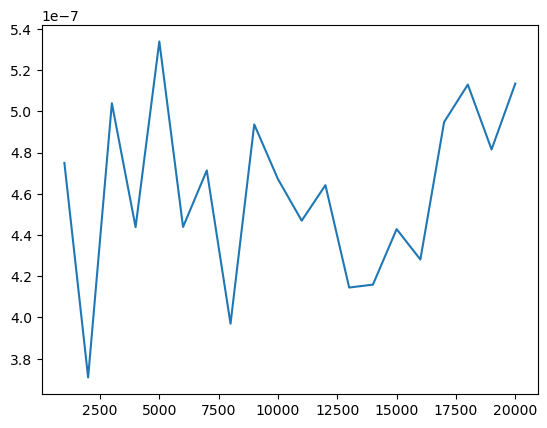

In [210]:
import matplotlib.pyplot as plt

plt.plot(sizes, dict_in_times);

縦軸の時間の単位は秒である．バラツキはあるものの，辞書の大きさにそれほど関係なく、平均的に数マイクロ秒（𝜇秒=$10^{−6}$秒）程度で1回の in 演算が実行されていることが分かる．

### Step 2: リストの in 演算の速さ

今度は $k = 1000, 2000, ..., 20000$ のそれぞれについて，長さ $k$ のリストに対する `in` 演算子の速さを調べよう．

具体的には，上で作成した辞書のキー（1, 2, ..., k）と同じ要素を含むリストを作成し、同様に `in` 演算の平均計算時間を計測する．上では辞書に値も入れたが，ここではリストにキーだけを入れる．
* 辞書に対する in の計算時間を調べた上のセルからプログラムをコピーして，下のセルに貼り付け，必要なところを書き換えなさい
* あとで辞書に対する計算時間と比べるために，平均計算時間は別の名前のリスト `list_in_times` に記録しなさい
* 1, 2, ..., k を要素とするリストは `list(range(1, k+1))` あるいは `[x for x in range(1, k+1)]` で作れる（後者はリスト内包記法という）．

In [211]:
# 辞書に対する in の計算時間を調べた上のセルからプログラムをコピーして
# このセルに貼り付け、必要なところを書き換えて実行しなさい
#
# 変更すべき点は
# * 辞書の代わりに，長さ k のリスト [1, 2, ..., k] を作る
# 
# * t = %timeit ... の行で random.randint(1, k) in d のところを
#      random.randint(1, k) in 作ったリスト
#   に書き換える（リストの名前を d にすれば変更の必要はない
#
# * dict_in_times の代わりに list_in_times というリストに結果を記録する
#

list_in_times = []
for k in sizes:
    l=list(range(1,k+1))
    t=%timeit -r 100 -n 100 -o random.randint(1,k)in l
    list_in_times.append(t.average)

3.4 μs ± 682 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
7.44 μs ± 819 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
12.2 μs ± 971 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
12.9 μs ± 1.77 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
14.7 μs ± 966 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
17.7 μs ± 1.14 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
20.5 μs ± 1.21 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
23.2 μs ± 1.27 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
26.1 μs ± 1.7 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.71 times longer than the fastest. This could mean that an intermediate result is being cached.
31.2 μs ± 17.8 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 6.11 times longer than the fastest. This could mean that an intermediate result is being cached.
37.5 μs ± 17.6 μs per loop (me

list と辞書に対する平均計算時間を重ねてプロットしてみよう：

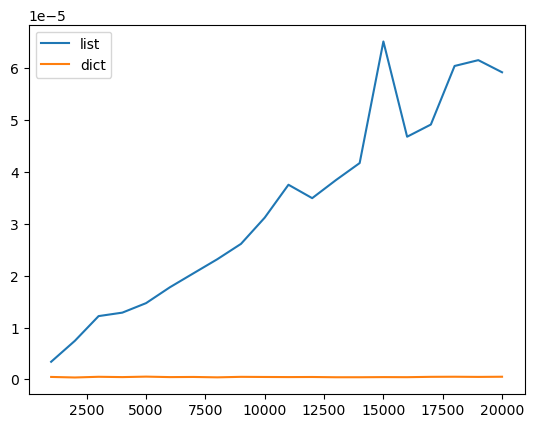

In [212]:
plt.plot(sizes, list_in_times,
         sizes, dict_in_times)
plt.legend(["list", "dict"]);

### Step 3: 要素が存在しない場合の計算時間 

ここまでの計算時間の計測では、1 から $k$ までの整数をキーとする辞書や，それらを要素とするリストに対して，1 から $k$ の範囲の乱数を含むかどうかを `in` でチェックしていた．よって、`in` 演算は常に `True` を返していた．

今度は、辞書やリストに対して，それらに含まれないような範囲（たとえば $k+1, k+2, \dots, 2k$）の乱数を発生させ、これまでと同様に `乱数 in 辞書` や `乱数 in リスト` の平均計算時間を調べなさい．

$A \le n \le B$ の範囲の乱数 $n$ は `random.randint(A, B)` で生成できる．

あとで比較するため，上で使った `list_in_times`、`dict_in_times` とは違う名前の変数に結果を記録しましょう．

（Step 1, Step 2 に比べだいぶ実行時間がかかります）

In [213]:
# 上のセルからコピペして適当に書き換え、
# 「（含まれない数) in 辞書」「（含まれない数) in リスト」の平均計算時間を 
# k = 1000, 2000, ..., 20000 について計測しなさい

# 辞書に対する False を返す in の平均計算時間
dict_in_fail_times = [] 

# リストに対する False を返す in の平均計算時間
list_in_fail_times = [] 
for k in sizes:
    d={x: x+1 for x in range (1,k+1)}
    l=list(range(1,k+1))
    t_dict_fail= %timeit -r 100 -n 100 -o random.randint(k+1,k*2) in d
    dict_in_fail_times.append(t_dict_fail.average)
    t_list_fail= %timeit -r 100 -n 100 -o random.randint(k+1,k*2) in l
    list_in_fail_times.append(t_list_fail.average)

The slowest run took 89.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1.01 μs ± 3.4 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 8.96 times longer than the fastest. This could mean that an intermediate result is being cached.
9.28 μs ± 6.08 μs per loop (mean ± std. dev. of 100 runs, 100 loops each)
429 ns ± 123 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
11.6 μs ± 89.5 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
415 ns ± 9.78 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
17.6 μs ± 615 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
403 ns ± 72.2 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
23.4 μs ± 334 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
456 ns ± 18 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
29.1 μs ± 438 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
421 ns ± 10.8 ns per loop (mean ± 

計測できたら、
* x が要素として含まれる場合の `x in リスト` の平均計算時間
* x が要素として含まれる場合の `x in 辞書` の平均計算時間
* x が要素として含まれない場合の `x in リスト` の平均計算時間
* x が要素として含まれない場合の `x in 辞書` の平均計算時間
の4通りを重ねてプロットしてみよう．

以下のセルでは，含まれない要素に対する `x in リスト` の平均計算時間のデータを
`list_in_fail_times`，含まれないキーに対する `x in 辞書` の平均計算時間のデータを
`dict_in_fail_times` という名前の変数に格納しているものとしている．

自分で作ったプログラムの変数名に従って適当に変更してから実行しなさい：

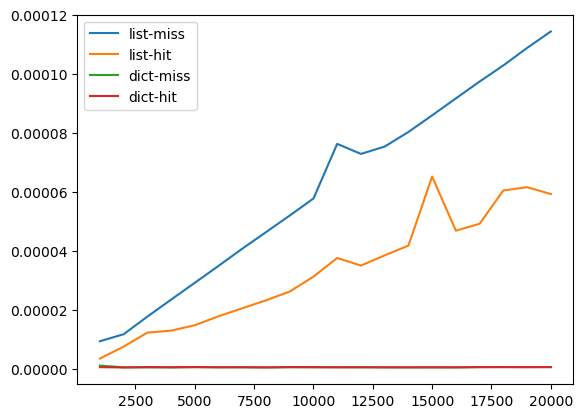

In [214]:
plt.plot(#--- 含まれない要素に対する x in リスト のデータ ---
         sizes, list_in_fail_times,
         #--- 含まれる要素に対する x in リスト のデータ ---
         sizes, list_in_times,
         #--- 含まれないキーに対する x in 辞書 のデータ ---
         sizes, dict_in_fail_times,
         #--- 含まれるキーに対する x in 辞書のデータ ---
         sizes, dict_in_times)

# plot の引数と対応する順番で legend (凡例）を指定する
plt.legend(["list-miss", "list-hit", "dict-miss", "dict-hit"]);

### Step 4: 考察

どうして上のようなグラフになるのか、考えたり調べたりしなさい．考えたことや分かったことは，この下に Markdown セルを作ってまとめてもよいし，考えるだけでもよい．

---

答えの一例（ダブルクリックで表示）：
<!--
* Python の list の実装は（動的）配列．
  リスト xs = [1, 2, ..., n] に対する x in xs という演算の平均計算量は
  x が 1, 2, ..., n の値をとる一様乱数ならば
  見つかる要素を探すとき n/2（平均するとリストの真ん中で x が見つかるため）、
  見つからない要素を探すとき n に比例する（リストの要素を全て調べて見つからないことを確かめるため）．

* Python の辞書の実装はハッシュ表．
  x in xs の平均計算量は要素数には依存しない（O(1))．
-->

## 課題提出の前の注意
* かならずメニューの "Run" から "Run All Cells" を選択し，全てのセルが正しく実行されることを確認すること
* "Run All Cells" を実行したら，各セルの実行結果が表示されている状態で保存のボタンを押してノートブックを保存すること
* 上記のようにして，実行結果まで含めて保存してからノートブックを提出すること．<font color="red">特に，チャレンジ課題をやった人はグラフが３つ出力されている状態で保存すること</font>．

**入門編５: おわり**